Exract data on handball courts from NYC Open Data 

Source:
1. DPR_Handball_001.json: https://data.cityofnewyork.us/Recreation/Directory-of-Handball-Courts/aviq-jvfs/about_data

### Data Dictionary 

Prop_ID: A unique identifier for the property. The first character is a abbreviation of the borough,
followed by a 3 digit number. Anything after the first 4 characters represents a subproperty.
Boroughs:
X - Bronx
B - Brooklyn
M - Manhattan
Q - Queens
R - Staten Island
See http://www.nycgovparks.org/bigapps/DPR_Parks_001.xml or http://www.nycgovparks.org/bigapps/DPR_Parks_001.json


Name: Name of the property


Location: Text location


Num_of_Courts: Number of courts in the property

In [11]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import folium

In [5]:
current_directory = os.getcwd()
data_dir = os.path.join(os.path.dirname(current_directory), 'Data')
data_dir

'/Users/irsaashraf/Desktop/Projects/Cafe Data/NYC-Cafes/Data'

In [6]:
hb_filename = "DPR_Handball_001.json"
hb_data = pd.read_json(os.path.join(data_dir, hb_filename))
hb_data.head(10)

,Prop_ID,Name,Location,Num_of_Courts,lat,lon
0,X174,174 St. Playground,E. 174 and Bronx River Avenue,4.0,NaN,NaN
1,X126,Abigail Playground,"Tinton Avenue, E. 156 St.",2.0,NaN,NaN
2,X169,Agnes Haywood Playground,"E. 215 St., Barnes Ave., E. 216 St.",2.0,40.8804,-73.8621
3,X172,Allerton Playground,"Allerton, Bouck, Throop Aves. & Stedman Place",4.0,40.8659,-73.8506
4,X219,Arcilla Playground,"Clay, Park, and Teller Aves., E. 164 St.",4.0,40.8270,-73.9148
5,X150J,Bailey Playground,Bailey Avenue & 234 St.,6.0,40.8818,-73.9002
6,X166,Behagen Playground,"165-166 Sts., Union Avenue",2.0,40.8258,-73.9008
7,X108,Belmont Playground,"E. 181 & E. 182 Sts., Crotona & Belmont Aves.",6.0,40.8504,-73.8874
8,X002,Brady Playground,Bronxdale Blvd. & Bronx Park East,4.0,40.8519,-73.8694
9,X183,Bruckner Playground,Phillips & Cross Bronx Expressway,2.0,40.8267,-73.8290


In [7]:
hb_data.shape

(547, 6)

### Number of courts per borough

In [8]:
borough_id_map = {"X": "Bronx", "B": "Brooklyn", "M": "Manhattan", "Q": "Queens", "R":"Staten Island"}

hb_data["Borough"] = hb_data['Prop_ID'].str[0].map(borough_id_map)
hb_data.head()

,Prop_ID,Name,Location,Num_of_Courts,lat,lon,Borough
0,X174,174 St. Playground,E. 174 and Bronx River Avenue,4.0,NaN,NaN,Bronx
1,X126,Abigail Playground,"Tinton Avenue, E. 156 St.",2.0,NaN,NaN,Bronx
2,X169,Agnes Haywood Playground,"E. 215 St., Barnes Ave., E. 216 St.",2.0,40.8804,-73.8621,Bronx
3,X172,Allerton Playground,"Allerton, Bouck, Throop Aves. & Stedman Place",4.0,40.8659,-73.8506,Bronx
4,X219,Arcilla Playground,"Clay, Park, and Teller Aves., E. 164 St.",4.0,40.8270,-73.9148,Bronx


In [25]:
hb_data.isnull().sum()

Prop_ID            0
Name               0
Location           1
Num_of_Courts      2
lat              110
lon              110
Borough            0
dtype: int64

In [26]:
hb_data.shape

(547, 7)

In [27]:
110/547

0.20109689213893966

In [9]:
courts_by_bor = hb_data.groupby("Borough")["Num_of_Courts"].sum().sort_values(ascending = False).reset_index()
courts_by_bor

,Borough,Num_of_Courts
0,Brooklyn,685.0
1,Queens,616.0
2,Bronx,398.0
3,Manhattan,259.0
4,Staten Island,52.0


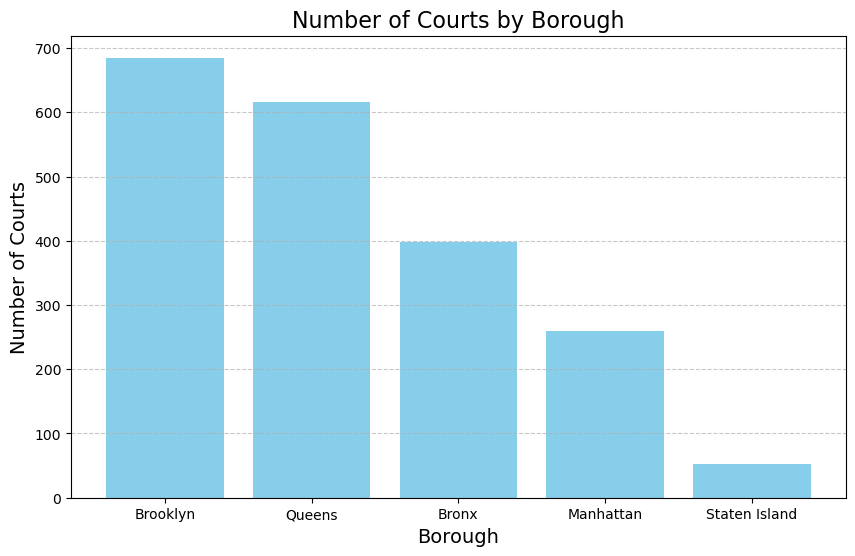

In [10]:
# Plotting the grouped data
plt.figure(figsize=(10, 6))
plt.bar(courts_by_bor['Borough'], courts_by_bor['Num_of_Courts'], color='skyblue')

# Adding title and labels
plt.title('Number of Courts by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Courts', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Create map of nyc using folium

In [19]:
# Initialize the map at the center of NYC

# Source: https://dev.to/manifoldmindaway/plotting-the-trees-of-nyc-with-folium-4ffo

center_lat = 40.7128
center_lon = -74.0060
nyc_map = folium.Map(location=[center_lat, center_lon], zoom_start=12.5)
nyc_map

In [24]:
# source: https://python-graph-gallery.com/288-map-background-with-folium/

# Add markers to map 
for idx, row in hb_data.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], popup=row['Name']).add_to(nyc_map)

ValueError: Location values cannot contain NaNs.